# Credit Card Spend Exploratory Analysis and Modeling

#### Prepared by Rabia Tariq: https://github.com/Rabia1995

## Contents

* [Introduction](#Introduction)
* [Imports](#Imports)
* [Objectives](#Objectives)
* [Loading the cleaned data](#Loading_the_cleaned_data)
* [Distribution of the target variable](#Distribution_of_the_target_variable)
* [Feature Correlation Heatmap and Scatter plots](#Feature_Correlation)
    * [Correlation Heatmap](#Correlation_Heatmap)
    * [Scatter plots of numeric features against total_spend_ln](#Scatter_plots)
* [Feature Importance and Selection](#Feature_Imp_Select)
    * [Feature Importance using Random Forest](#Feat_Imp)
        * [Assupmtions](#Assumptions)
    * [Feature Selection using Recursive Feature Elimination](#Feat_Select)
* [Dealing with multicolinearity with VIF](#Multicolinearity)
* [Building Regression Model](#Model)
    * [OLS Model](#OLSModel)
        * [P-values to drop features](#p-values)
        * [Model Evaluation using MSE, MAE, RMSE](#Evaluation)
        * [Normality of Residuals](#Residuals)
    * [RandomForest Model](#RandomForest)
    * [XGBoost Model](#XGBoost)
    * [Comparison of models based on MSE, MAE, RMSE](#comparison)
* [Predicting the credit card spend](#Prediction)
* [Conclusion](#Conclusion)

## Introduction

Credit cards are great, convenient method of making payments, easier to carry than cash, helps you build a credit rating and are there if you need emergency cash. Banks provide these credit cards to an individual and determine the credit limit for each card based on certain factors. People are willing to spend more when paying with a credit card instead of cash. Lenders like to understand the factors driving the credit card spend. How can we use the data to understand what is driving the total spend, and given those factors predicting the limit of their credit spent for new applicants?


We have cleaned our data, so now we can look at some of the relationships between variables. Looking at the relationships between variables is very important so that we can find patterns and make educated inference from our data and provide the relevant information.

In the previous steps, we have taken care of the outliers, dropped the necessary columns which is not going to have a very large impact our analysis. We also created dummy variables for the categorical columns and now we have a cleaned dataset.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFE
from patsy import dmatrices
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

## Objectives

For our exploratory analysis, we want to try and understand our data in a better way and look at the relationships that might be present within the variables in the data. We can do this by:

- Creating visualizations and heatmaps.
- Exploring the relationships using statistical analysis
- Selecting important features

## Loading the cleaned data<a id='Loading_the_cleaned_data'></a>

In [2]:
cust_data = pd.set_option('display.max_columns', None)

In [3]:
cust_data = pd.read_csv('cust_data_cleaned.csv')

In [4]:
cust_data.head()

age  ed     lninc  debtinc  creddebt  lncreddebt   othdebt  lnothdebt  \
0   20  15  3.433987     11.1  1.200909    0.183079  2.240091   0.806516   
1   22  17  2.708050     18.6  1.222020    0.200505  1.567980   0.449788   
2   67  14  3.555348      9.9  0.928620   -0.074056  2.536380   0.930738   
3   23  16  2.995732      5.7  0.033160   -3.401690  1.117200   0.110826   
4   26  16  3.135494      1.7  0.214659   -1.538705  0.176341  -1.735336   

   reside  pets  pets_cats  pets_dogs  pets_birds  pets_reptiles  pets_small  \
0       3     0          0          0           0              0           0   
1       2     6          0          0           0              0           0   
2       3     3          2          1           0              0           0   
3       5     0          0          0           0              0           0   
4       4     0          0          0           0              0           0   

   pets_saltfish  pets_freshfish  carvalue  commutetime  longmon  lnlongmon  \
0              0               0      14.3         22.0     6.50   1.871802   
1              0               6       6.8         29.0     8.90   2.186051   
2              0               0      18.8         24.0    28.40   3.346389   
3              0               0       8.7         38.0     6.00   1.791759   
4              0               0      10.6         32.0     3.05   1.115142   

   tollten  equipten  cardmon  cardten  wireten  hourstv  income  total_spend  \
0   161.05     126.1    14.25     60.0     0.00       13      31       149.46   
1     0.00    1975.0    16.00    610.0  1683.55       18      15        77.54   
2     0.00       0.0    23.00   1410.0     0.00       21      35       359.97   
3     0.00       0.0    21.00    685.0     0.00       26      20       359.41   
4   387.70       0.0    17.25    360.0   410.80       27      23       507.83   

   total_spend_ln  birthmonth  jobcat  union  employ  retire  default  \
0        5.007029           9       1      1       0       0        1   
1        4.350794           5       2      0       0       0        1   
2        5.886021           6       2      0      16       0        0   
3        5.884464           5       2      0       0       0        1   
4        6.230147           7       2      0       1       0        0   

   marital  homeown  address  carbuy  commute  commutecar  commutemotorcycle  \
0        0        0        0       0        8           0                  1   
1        0        1        2       0        1           1                  0   
2        1        1       30       1        4           1                  0   
3        1        1        3       1        1           1                  0   
4        1        0        3       1        6           0                  0   

   commutecarpool  commutebus  commuterail  commutepublic  commutebike  \
0               1           0            0              0            0   
1               0           1            0              0            1   
2               1           1            1              0            0   
3               0           0            0              0            0   
4               0           0            0              1            0   

   commutewalk  commutenonmotor  telecommute  polparty  polcontrib  vote  \
0            1                0            0         1           0     1   
1            0                1            1         1           0     0   
2            0                0            0         1           0     0   
3            0                0            0         0           0     0   
4            1                0            0         0           0     0   

   cardfee  cardtenure  card2fee  card2tenure  active  churn  tollfree  equip  \
0        0           2         0            3       0      1         1      1   
1        0           4         0            4       1      0         0      1   
2        0          35         0      

In [5]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 191 entries, age to internet_4
dtypes: float64(17), int64(174)
memory usage: 7.3 MB


## Distribution of the target variable<a id='Distribution of the target variable'></a>

First of all we are going to look at the distribution of our target variable, which is __total spend__. Regression assumes that the distribution of our dependent variable is normal.

C:\Users\Taimoor\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Total Spend')

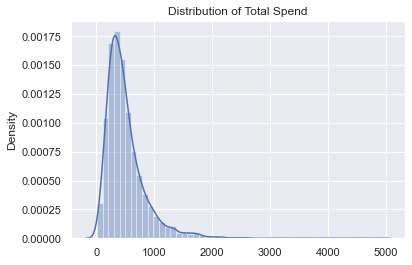

In [4]:
sns.set(font_scale=1)
sns.distplot(cust_data[['total_spend']])
plt.title('Distribution of Total Spend')

Here we can see our target variable is right skewed. Next we will look at distribution against the theoretical normal distribution with the help of probability plot. so that we can graphically see and assess whether or not our target variable follows the normal distribution.

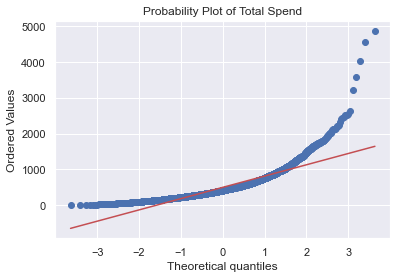

In [5]:
sns.set(font_scale=1)
stats.probplot(cust_data['total_spend'], dist="norm", plot=pylab)
plt.title('Probability Plot of Total Spend')
pylab.show()

As we can see from the plot our data is not distributed normally, so we will use the log of __total spend__ and again look at the distribution to see how it changed. We previously created the column __total_spend_ln__ which was created using the log of the target variable. So lets look at its distribution.

C:\Users\Taimoor\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Log Total Spend')

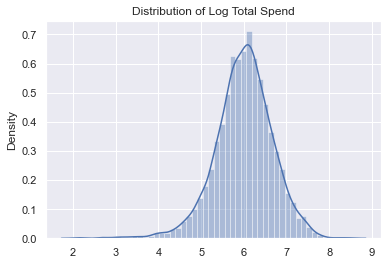

In [6]:
sns.distplot(cust_data[['total_spend_ln']])
plt.title('Distribution of Log Total Spend')

As we can see by taking the log, the skewness of our variable is greatly reduced. Again we will graphically look at the distribution of our variable against the theoretical normal distribution using the probability plot. 

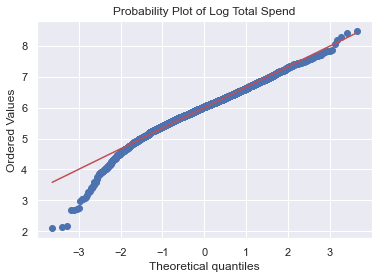

In [7]:
sns.set(font_scale=1)
stats.probplot(cust_data['total_spend_ln'], dist="norm", plot=pylab)
plt.title('Probability Plot of Log Total Spend')
pylab.show()

As can be seen from the above graph, our variable distribution is now a lot closer to the theoretical normal distribution. We learned from the analysis of the distribution of the target variables that __total_spend is right skewed. So taking the log of it reduces the skewedness.__

__So I am going to drop the total_spend colum from the dataset and total_spend_ln will be my target variable now.__

In [4]:
cust_data.drop('total_spend', axis = 1, inplace = True)

## Feature Correlation Heatmap and Scatter plots<a id='Feature_Correlation'></a>

### Correlation Heatmap<a id='Correlation_Heatmap'></a>

Let's generate a heatmap now which will represent the data in a 2-dimesional form and will provide a colored visual summary of information. It will help us find which variables have the highest correlation with each other and our target variable.

In [7]:
features = ['total_spend_ln','age', 'ed', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt',  
            'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 
            'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'longmon', 
            'lnlongmon',  'tollten',  'equipten', 'cardmon', 'cardten',  'wireten', 'hourstv', 'income']

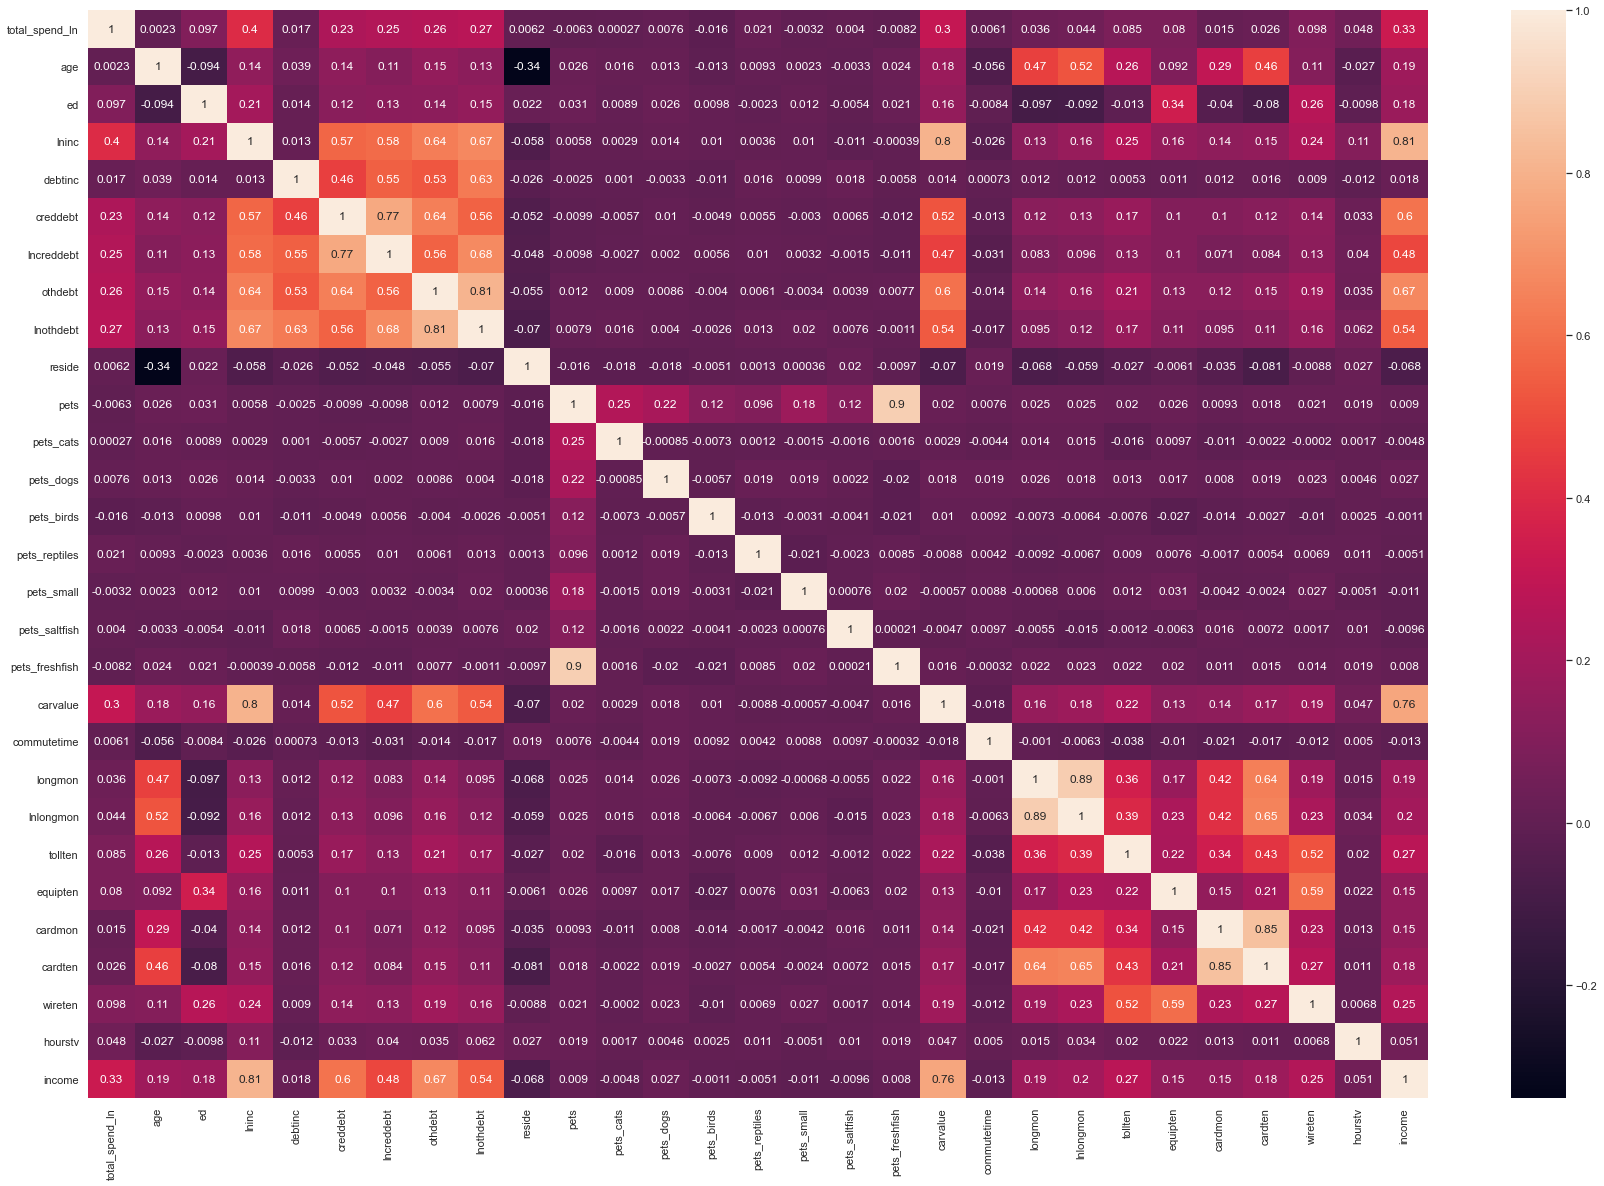

In [12]:
#Seaborn heatmap of correlations in cust_data
plt.subplots(figsize=(30, 20))
sns.heatmap(cust_data[features].corr(), annot=True);

Here we can see some correlations between the different variables. We are more interested in the correlations with our dependent variable __total_spend_ln__. Some of the correlations we can see are __income, carvalue, lnothdebt, lncreddebt, lninc__ which will be usefull in our model to make predictions of our target variable.

### Scatter plots of numeric features against total_spend_ln<a id='Scatter_plots'></a>

Correlations, particularly viewing them together as a heatmap, can be a great first pass at identifying patterns. But correlation can mask relationships between two variables. We'll now create a series of scatterplots to really dive into how total spend varies with other numeric features.

In [13]:
# define useful function to create scatterplots of total spend against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=1.0, hspace=1.0)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'total_spend_ln', data= cust_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Total Spend')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [14]:
features1 = ['age', 'ed', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt',  
            'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 
            'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'longmon', 
            'lnlongmon',  'tollten',  'equipten', 'cardmon', 'cardten',  'wireten', 'hourstv', 'income']

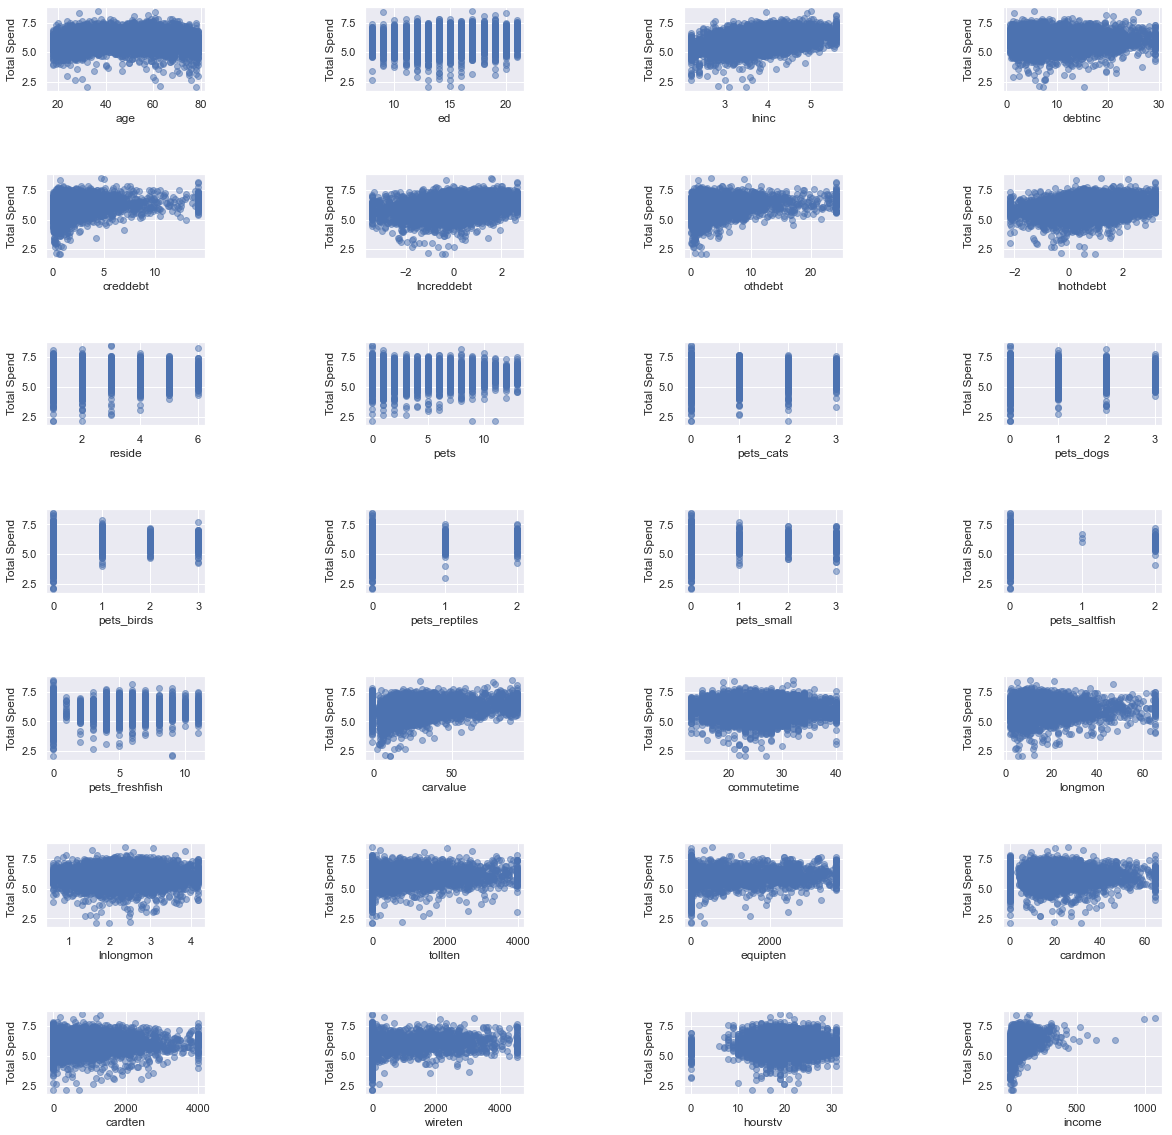

In [15]:
scatterplots(features1, ncol=4, figsize=(20, 20))

In the scatterplots we see some of the correlations were clearly picking up on. There's a positive correlation with lninc. Our target variable seems to have the strongest correlation with __lninc__. __lncreddebt__ and __lnothdebt__ appear quite similar but also useful. __carvalue__ also has correlation with our target variable and seems to be useful. 

For our target feature total_spend_ln, there are a few correlations observed through heatmap and scatter plots. The correlation with car value means that people who have cars with greater vehicle sticker prices, tend to spend more on their credit cards monthly. Similarly people with higher income spend more montly on their credit cards.


In the next step, as log of all these variables is present in the data, I will drop them. ['income','othdebt','creddebt']

In [5]:
cust_data.drop(['income','othdebt','creddebt'], axis = 1, inplace = True)

In [6]:
cust_data.shape

(5000, 187)

So, up till this point of our analysis we:

- Looked at the distribution of our target variable and taken the log of it to remove skewedness 
- Removed the variables whose log are present in the data
- Found the relationships between Total spend, lninc, lncreddebt, lnothdebt and carvalue

Now, the next steps will be to do feature selection and find feature importance through __GridSearchCV__ using __Random Forest Regressor__ as an estimator

## Feature importance and Selection<a id='Feature_Imp_Select'></a>

### Feature Importance using Random Forest<a id='Feat_Imp'></a>

So far, we've treated our data as a single entity. In machine learning, when we train our model on all of our data, we end up with no data set aside to evaluate model performance. We could keep making more and more complex models that fit the data better and better and not realise we were overfitting to that one set of samples. By partitioning the data into training and testing splits, without letting a model (or missing-value imputation) learn anything about the test split, we have a somewhat independent assessment of how your model might perform in the future. 

Random forest has a number of hyperparameters that can be explored, however here we'll limit ourselves to exploring some different values for the number of trees using GridSeachCV. By using RandomForestRegressor we will be looking at the feature importance and see what features are the most important for our model to predict the total spend

In [11]:
X_train, X_test, y_train, y_test = train_test_split(cust_data.drop(columns='total_spend_ln'), 
                                                    cust_data['total_spend_ln'], test_size=0.3, 
                                                    random_state=47)

In [19]:
param_grid={'n_estimators': np.arange(10,50)}

In [20]:
rf = RandomForestRegressor()
rf_grid_cv = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1)

In [21]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])})

In [22]:
rf_grid_cv.best_params_

{'n_estimators': 46}

In [12]:
rf_model = RandomForestRegressor(n_estimators = 27)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=27)

Now let's create a dataframe of the feature importances so that we can use it to graphically see the importance

In [13]:
ce = pd.DataFrame({'features': X_train.columns,'feature_importance':rf_model.feature_importances_})
ce.sort_values('feature_importance',ascending=False,inplace=True)
ce.head(10)

features  feature_importance
2          lninc            0.184109
5      lnothdebt            0.032678
4     lncreddebt            0.031293
15      carvalue            0.030878
16   commutetime            0.027064
3        debtinc            0.026632
24       hourstv            0.019732
152       card_2            0.019367
33       address            0.019181
154       card_4            0.017875

<AxesSubplot:title={'center':'Importance of Features'}, xlabel='feature_importance', ylabel='features'>

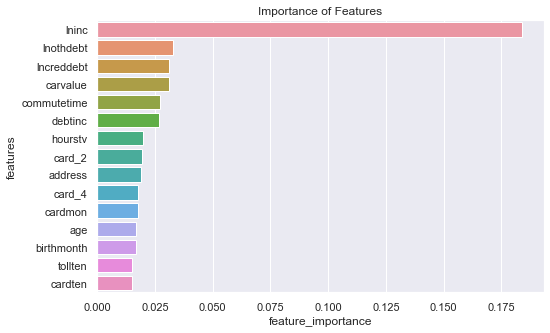

In [14]:
plt.subplots(figsize=(8, 5))
plt.title('Importance of Features')
sns.barplot(x = ce.iloc[:15,:].feature_importance, y = ce.iloc[:15,:].features)

Here we can see the top 4 features are

- lninc
- carvalue
- lnothdebt
- lncreddebt


#### Assumptions

Some of the assumptions that can be made from our analysis of the data


- __lninc__: If a user has high income he is likely to buy expensive items hence credit card spent would be more.
         

- __carvalue__:People who have cars with greater vehicle sticker prices, have better cars. They might have luxury cars which means they have higher income and tend to spend more on their credit cards monthly as they have more income
               

- __age__: People belonging to different age groups have different expenses hence display different credit card spent pattern.


- __debtinc__: If debt to income ratio is high person is likely to spend less.


- __card__: Having different card types can reflect on the income of a person. Suppose if a person has platinum or black card, his income is likely to be high and so the spending may also be high. 


- __ed__: If person is highly educated, he probably has a better job and thus a better income so he can spend more.

### Feature Selection using Recursive Feature Elimination<a id='Feat_Select'></a>

We want to select the features that are important for our prediction. We can do that using Recursive Feature Elimination.
Given an external estimator that assigns weights to features, the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained. Then, the least important features are cut off from current set of features. That procedure is recursively repeated on the thinned set until the desired number of features to select is eventually reached. 

As we have a lot of features, it will also help to reduce the number of features that we have to work with.

In [28]:
X = cust_data.drop(columns='total_spend_ln')

# Set the feature eliminator to remove 10 features on each step
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select = None, step = 10 , verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 186 features.
Fitting estimator with 176 features.
Fitting estimator with 166 features.
Fitting estimator with 156 features.
Fitting estimator with 146 features.
Fitting estimator with 136 features.
Fitting estimator with 126 features.
Fitting estimator with 116 features.
Fitting estimator with 106 features.
Fitting estimator with 96 features.
Index(['age', 'ed', 'lninc', 'debtinc', 'lncreddebt', 'lnothdebt', 'reside',
       'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_freshfish',
       'carvalue', 'commutetime', 'longmon', 'lnlongmon', 'tollten',
       'equipten', 'cardmon', 'cardten', 'wireten', 'hourstv', 'birthmonth',
       'jobcat', 'employ', 'marital', 'homeown', 'address', 'carbuy',
       'commute', 'commutecarpool', 'commutebus', 'commuterail', 'commutewalk',
       'polparty', 'vote', 'cardtenure', 'card2fee', 'card2tenure', 'active',
       'voice', 'callid', 'ebill', 'owncd', 'ownipod', 'owngame',
       'response_02', 'region_2', 'region

So, these are the following features that are selected by using Recursive Feature Elimination. Now we will use these features for our model. But first, we have to check for multicolinearity and drop the features that are colinear. 

In [7]:
feat_selected =  ['age', 'ed', 'lninc', 'debtinc', 'lncreddebt', 'lnothdebt', 'reside',
       'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_freshfish',
       'carvalue', 'commutetime', 'longmon', 'lnlongmon', 'tollten',
       'equipten', 'cardmon', 'cardten', 'wireten', 'hourstv', 'birthmonth',
       'jobcat', 'union', 'employ', 'homeown', 'address', 'carbuy', 'commute',
       'commutecarpool', 'commutebus', 'commuterail', 'commutewalk',
       'polparty', 'polcontrib', 'vote', 'cardtenure', 'card2fee',
       'card2tenure', 'active', 'voice', 'callid', 'ebill', 'owncd', 'ownipod',
       'owngame', 'news', 'response_02', 'response_03', 'region_2', 'region_3',
       'region_5', 'townsize_2', 'townsize_3', 'gender_1', 'agecat_5',
       'edcat_2', 'edcat_3', 'empcat_3', 'jobsat_3', 'jobsat_4', 'hometype_2',
       'cars_2', 'cars_3', 'cars_6', 'carown_0', 'cartype_0', 'cartype_1',
       'carbought_0', 'carbought_1', 'reason_2', 'reason_9', 'polview_2',
       'polview_3', 'polview_4', 'polview_5', 'card_2', 'card_3', 'card_4',
       'card_5', 'cardtype_2', 'cardtype_3', 'cardtype_4', 'cardbenefit_3',
       'card2_2', 'card2_3', 'card2_4', 'card2type_2', 'card2type_4',
       'card2benefit_2', 'card2benefit_3', 'bfast_3']

## Dealing with multicolinearity with VIF<a id='Multicolinearity'></a>

In regression, "multicollinearity" refers to predictors that are correlated with other predictors.  Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other. In other words, it results when you have factors that are a bit redundant. Multicollinearity increases the standard errors of the coefficients. By overinflating the standard errors, multicollinearity makes some variables statistically insignificant when they should be significant. Without multicollinearity, those coefficients might be significant. Multicollinearity is a problem because it undermines the statistical significance of an independent variable.

One way in which we can deal with multicolinearity is __Variance Inflation Factor (VIF)__. VIF assesses how much the variance of an estimated regression coefficient increases if your predictors are correlated. If no factors are correlated, the VIFs will all be 1. In general, a VIF above 10 indicates high correlation and is cause for concern. So, we will check the VIF of our features and drop those that have VIF greater than 10

In [8]:
feat_selected.append('total_spend_ln')
rf_df = cust_data[feat_selected]
features = "+".join(feat_selected)
features

'age+ed+lninc+debtinc+lncreddebt+lnothdebt+reside+pets+pets_cats+pets_dogs+pets_birds+pets_freshfish+carvalue+commutetime+longmon+lnlongmon+tollten+equipten+cardmon+cardten+wireten+hourstv+birthmonth+jobcat+union+employ+homeown+address+carbuy+commute+commutecarpool+commutebus+commuterail+commutewalk+polparty+polcontrib+vote+cardtenure+card2fee+card2tenure+active+voice+callid+ebill+owncd+ownipod+owngame+news+response_02+response_03+region_2+region_3+region_5+townsize_2+townsize_3+gender_1+agecat_5+edcat_2+edcat_3+empcat_3+jobsat_3+jobsat_4+hometype_2+cars_2+cars_3+cars_6+carown_0+cartype_0+cartype_1+carbought_0+carbought_1+reason_2+reason_9+polview_2+polview_3+polview_4+polview_5+card_2+card_3+card_4+card_5+cardtype_2+cardtype_3+cardtype_4+cardbenefit_3+card2_2+card2_3+card2_4+card2type_2+card2type_4+card2benefit_2+card2benefit_3+bfast_3+total_spend_ln'

In [9]:
y, X = dmatrices('total_spend_ln~ '+ features, rf_df, return_type='dataframe')

In [10]:
# For each X, calculate VIF and save in the dataframe
vif_df = pd.DataFrame()
vif_df["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df["features"] = X.columns
vif_df.sort_values(by=['VIF Factor'],ascending=False).head(10)

C:\Users\Taimoor\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor        features
68         inf       cartype_0
69         inf       cartype_1
70         inf     carbought_0
71         inf     carbought_1
0   531.633638       Intercept
8    18.170002            pets
38   17.135999      cardtenure
40   16.152400     card2tenure
12   15.931722  pets_freshfish
3     9.557882           lninc

In [11]:
vif = vif_df[vif_df['VIF Factor'] > 10].reset_index().loc[:,['features']]
vif.drop([0],axis = 0,inplace=True)
drop_vars= vif["features"].tolist()
drop_vars

['pets',
 'pets_freshfish',
 'cardtenure',
 'card2tenure',
 'cartype_0',
 'cartype_1',
 'carbought_0',
 'carbought_1']

Here we can see the following features have VIF greater than 10, so we will drop these features:

- pets
- pets_freshfish
- cardtenure
- card2tenure
- cartype_0
- cartype_1
- carbought_0
- carbought_1

In [12]:
rf_df.drop(drop_vars, axis = 1, inplace=True)
rf_df.shape

C:\Users\Taimoor\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(5000, 86)

## Building Regression Model<a id='Model'></a>

### OLS Model<a id='OLSModel'></a>

Now we are going to build a model to predict the total spend of the customers. First we are going to split the data into training and testing. We will use Ordinary Least Squares (OLS)

Ordinary Least Squares is a method in Linear Regression for estimating the unknown parameters by creating a model which will minimize the sum of the squared errors between the observed data and the predicted one.

In [13]:

X_train, X_test, y_train, y_test = train_test_split(rf_df.drop(columns='total_spend_ln'), 
                                                    rf_df['total_spend_ln'], test_size=0.25, 
                                                    random_state = 47)

In [21]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
lm = sm.OLS(y_train, X_train).fit()

In [22]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         total_spend_ln   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     22.23
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          8.77e-266
Time:                        20:54:11   Log-Likelihood:                -3057.8
No. Observations:                3750   AIC:                             6288.
Df Residuals:                    3664   BIC:                             6823.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.3144      0.177     30.

#### P-values to drop features<a id='p-values'></a>

Now we are going to look at the summary and the p-values of the features. Then we will create a list of features with p-values greater than 0.05 and then drop those values from our data.

In [23]:
drop_feat = ['age', 'ed', 'debtinc', 'lncreddebt', 'lnothdebt', 'reside',
       'pets_cats', 'pets_dogs', 'pets_birds',
       'carvalue', 'commutetime', 'longmon', 'lnlongmon', 'tollten',
       'equipten', 'cardmon', 'cardten', 'wireten', 'hourstv', 'birthmonth',
       'jobcat', 'union', 'employ', 'homeown', 'address', 'carbuy', 'commute',
       'commutecarpool', 'commutebus', 'commuterail', 'commutewalk',
       'polparty', 'polcontrib', 'vote', 'card2fee',
       'active', 'voice', 'callid', 'ebill', 'owncd', 'ownipod',
       'owngame', 'news', 'response_02', 'region_2', 'region_3',
       'townsize_2', 'townsize_3', 'agecat_5',
       'edcat_2', 'edcat_3', 'empcat_3', 'jobsat_3', 'jobsat_4', 'hometype_2',
       'cars_2', 'cars_3', 'cars_6', 'carown_0', 'polview_2',
       'polview_3', 'polview_4', 'polview_5', 'cardtype_2', 'cardtype_3', 
       'cardtype_4', 'cardbenefit_3', 'card2type_2', 'card2type_4',
       'card2benefit_2', 'card2benefit_3', 'bfast_3']

In [24]:
X_train.drop(drop_feat,axis=1, inplace = True)
X_test.drop(drop_feat,axis=1, inplace = True)
model = sm.OLS(y_train,X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         total_spend_ln   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     139.4
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          9.85e-309
Time:                        20:54:17   Log-Likelihood:                -3096.0
No. Observations:                3750   AIC:                             6220.
Df Residuals:                    3736   BIC:                             6307.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.3138      0.063     84.229      

#### Model Evaluation using MSE, MAE, RMSE<a id='Evaluation'></a>


Now that we have fit our model to our training data, We are going to evaluate the model. Metrics that summarise the difference between predicted and actual values are mean absolute error and mean squared error. Mean absolute error is simply the average of the absolute errors. Mean squared error is an important metric for optimizing machine learning models. This is simply the average of the square of the errors:

In [25]:
test_pred = results.predict(X_test)

In [26]:
ols_MSE = metrics.mean_squared_error(np.exp(y_test),np.exp(test_pred))
ols_MAE = metrics.mean_absolute_error(np.exp(y_test),np.exp(test_pred))
ols_RMSE = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(test_pred)))
print('MSE for Test:',ols_MSE)
print ('MAE:', ols_MAE)
print ('RMSE:', ols_RMSE)

MSE for Test: 93467.19582624147
MAE: 197.7604479648383
RMSE: 305.7240517627644


In [24]:
tot_spend_ln = pd.DataFrame(y_test)
tot_spend_ln['pred_total_spend_ln'] = test_pred
tot_spend_ln

total_spend_ln  pred_total_spend_ln
3010        5.023288             5.903262
1376        5.741399             5.823382
4368        5.634682             6.076664
713         5.528992             5.783019
206         7.793595             6.777161
...              ...                  ...
1834        5.692755             5.865804
2833        5.690292             5.851115
3218        6.169778             5.454478
3228        7.006306             6.871852
419         5.801937             6.784364

[1250 rows x 2 columns]

#### Normality of Residuals<a id='Residuals'></a>

Residuals, in the context of regression models, are the difference between the observed value of the target variable and the predicted value, i.e. the error of the prediction. Now we check whether the residuals are normal. If the residuals are normally distributed, then their quantiles when plotted against quantiles of normal distribution should form a straight line. 

C:\Users\Taimoor\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Residuals'}, ylabel='Density'>

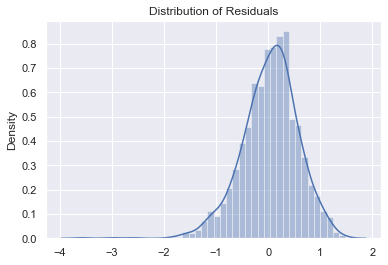

In [30]:
sns.set(font_scale=1)
residuals = y_test - test_pred
plt.title('Distribution of Residuals')
sns.distplot(residuals)

From the above histogram and Q-Q plot, shows that the residuals are normally distributed, so our assumption is not violated

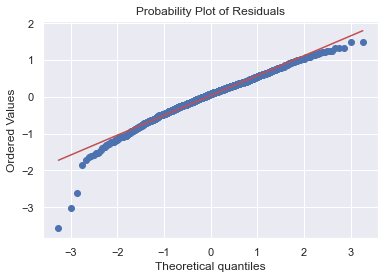

In [31]:
stats.probplot(residuals,dist='norm',plot=pylab)
plt.title('Probability Plot of Residuals')
pylab.show()

### RandomForest model<a id='RandomForest'></a>

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. Predictions are made by averaging the predictions of each decision tree. Or, to extend the analogy much like a forest is a collection of trees, the random forest model is also a collection of decision tree models.
Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap. This makes random forests a strong modeling technique that’s much more powerful than a single decision tree.

Random forest has a number of hyperparameters that can be explored, however here you'll limit yourselves to exploring some different values for the number of trees.

In [14]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
param_grid={'n_estimators': n_est}

In [15]:
rf_grid_cv = GridSearchCV(RandomForestRegressor(random_state = 47), param_grid= param_grid, cv= 5, n_jobs=-1)

In [16]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=47), n_jobs=-1,
             param_grid={'n_estimators': [10, 12, 16, 20, 26, 33, 42, 54, 69,
                                          88, 112, 143, 183, 233, 297, 379, 483,
                                          615, 784, 1000]})

In [17]:
rf_grid_cv.best_params_

{'n_estimators': 615}

In [14]:
rf_model = RandomForestRegressor(n_estimators = 615, random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=615, random_state=0)

In [15]:
y_pred_rf = rf_model.predict(X_test)

In [16]:
rf_MSE = metrics.mean_squared_error(np.exp(y_test),np.exp(y_pred_rf))
rf_MAE = metrics.mean_absolute_error(np.exp(y_test),np.exp(y_pred_rf))
rf_RMSE = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_rf)))
print('MSE for Test:',rf_MSE)
print ('MAE:', rf_MAE)
print ('RMSE:', rf_RMSE)

MSE for Test: 103425.75517508449
MAE: 208.2957644264379
RMSE: 321.59874871504786


### XGBoost Model<a id='XGBoost'></a>

Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

In [17]:
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.482 (0.022)


In [18]:
xgb_r = XGBRegressor(objective ='reg:linear',
                  n_estimators = 1000, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  

[20:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
# Predict the model
pred = xgb_r.predict(X_test)

In [20]:
xg_MSE = metrics.mean_squared_error(np.exp(y_test),np.exp(pred))
xg_MAE = metrics.mean_absolute_error(np.exp(y_test),np.exp(pred))
xg_RMSE = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred)))
print('MSE for Test:',xg_MSE)
print ('MAE:', xg_MAE)
print ('RMSE:', xg_RMSE)

MSE for Test: 108212.09683540392
MAE: 216.37656196606443
RMSE: 328.9560712852157


### Comparison of models based on MSE, MAE, RMSE<a id='comparison'></a>

In [28]:
eval_table = pd.DataFrame(data = [[ols_MSE, ols_MAE, ols_RMSE], [rf_MSE, rf_MAE, rf_RMSE], [xg_MSE, xg_MAE, xg_RMSE]], index = ['OLS', 'RandomForest', 'XGBoost'])
eval_table.columns = ['MSE', 'MAE', 'RMSE']
eval_table

MSE         MAE        RMSE
OLS            93467.195826  197.760448  305.724052
RandomForest  103425.755175  208.295764  321.598749
XGBoost       108212.096835  216.376562  328.956071

From the mean squared error, mean absolute error, and root mean squared error of our different models, it can be seen that our OLS model performs the best. So, we will use that model to make our predictions 

## Predicting the credit card spend<a id='Prediction'></a>

Our target variable was the log of the total spend. So, to get the predictions of the total spend, we take the inverse of our predicted values.

In [52]:
sales_predictions = pd.DataFrame(np.exp(y_test))
sales_predictions.columns = ['Actual_total_spend']
sales_predictions['Pred_total_spend'] = np.exp(test_pred)
sales_predictions.head()

Actual_total_spend  Pred_total_spend
3010              151.91        366.230224
1376              311.50        338.113679
4368              279.97        435.573564
713               251.89        324.737996
206              2425.02        877.573900

## Conclusion<a id='Conclusion'></a>

We have done the data wrangling, exploratory data analysis, preprocessing and training, and finally built some models. Our objective was to find the important features which determine what drives the bank customers’ monthly spending on their credit cards. Also, we wanted to create the model which predicts that spend. We have built our model and predicted the total spend of the customers. All this work is important because it can help banks determine the credit limit of customers. As banks look at different factors in determining the credit limit of an individual, one of them being their spending history and spending habits. So, the banks can use the predictive model to help inn determining the credit limit of the customers in future.